# Import Library

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from re import sub

# Read DataSet

In [2]:
A = pd.read_csv("D:/DataSet/csvdata/laptop_price.csv",encoding='ISO-8859-1')

In [3]:
A.sample(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
424,431,Dell,Alienware 17,Gaming,17.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2799.0
500,507,Asus,VivoBook E201NA,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.2kg,340.0
652,660,Dell,XPS 13,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1449.9


# EDA

In [4]:
# sb.barplot(x=A.TypeName,y=A.Price_euros)

In [5]:
A.corr()[["Price_euros"]]

,Price_euros
laptop_ID,0.067830
Inches,0.068197
Price_euros,1.000000


In [6]:
# sb.barplot(x=A.Inches,y=A.Price_euros)

In [7]:
# sb.barplot(x=A.ScreenResolution,y=A.Price_euros)
# plt.xticks(rotation="vertical")
# plt.show()

In [8]:
A["Resolution"] = A.ScreenResolution.apply(lambda x: x.split(" ")[-1])

In [9]:
# sb.barplot(x=A.Resolution,y=A.Price_euros)
# plt.xticks(rotation="vertical")
# plt.show()

In [10]:
# A.ScreenResolution.unique()

In [11]:
# A["TouchScreen"] = TochScreen

In [12]:
Toch = []
for i in A.ScreenResolution:
    if 'Touchscreen' in i:
        Toch.append(1)
    else:
        Toch.append(0)

In [13]:
A["Touchscreen"] = Toch

In [14]:
A.Touchscreen = A.Touchscreen.astype("int")

In [15]:
A.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0


In [16]:
Ips = []
for i in A.ScreenResolution:
    if 'IPS Panel' in i:
        Ips.append(1)
    else:
        Ips.append(0)

In [17]:
A["Ips_Panel"] = Ips

In [18]:
A.Ips_Panel = A.Ips_Panel.astype("int")

In [19]:
A = A.drop(labels=["ScreenResolution"],axis=1)

In [20]:
A.head(2)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Touchscreen,Ips_Panel
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0,0


# CPU

In [21]:
A = A.drop(labels=["Product"],axis=1)

In [22]:
A['Processor_Name'] = A.Cpu.apply(lambda x: x.split(" ")[0])

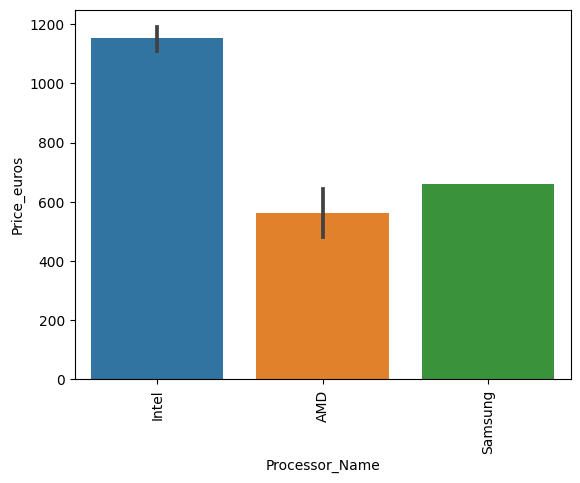

In [23]:
sb.barplot(x=A.Processor_Name,y=A.Price_euros)
plt.xticks(rotation="vertical")
plt.show()

In [24]:
A.head(2)

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Touchscreen,Ips_Panel,Processor_Name
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0,1,Intel
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0,0,Intel


In [25]:
Processor_Generation = []
for i in A.Cpu:
    if "Intel" in i:
        Processor_Generation.append(i.split(" ")[2])
        
    if "Samsung" in i:
        Processor_Generation.append(i.split(" ")[1])
    
    if "AMD" in i:
        Processor_Generation.append(i.split(" ")[-3])        
#         d = sub("[^a-zA-Z0-9-]","",i.split(" ")[-3])
#         print(d)

In [26]:
len(Processor_Generation)

1303

In [27]:
A['Processor_Generation'] = Processor_Generation

In [28]:
A.Processor_Generation.value_counts()

i7            527
i5            423
i3            136
Dual           83
Quad           35
M              19
A9-Series      17
A6-Series      11
E-Series        9
A12-Series      8
A10-Series      6
x5-Z8350        5
Ryzen           4
x5-Z8550        4
A8-Series       4
X5-Z8350        2
E3-1535M        2
E3-1505M        2
FX              2
Z8350           1
A4-Series       1
x5-Z8300        1
Cortex          1
Name: Processor_Generation, dtype: int64

In [29]:
# sb.barplot(x=A.Processor_Generation,y=A.Price_euros)
# plt.xticks(rotation="vertical")
# plt.show()

In [30]:
A["Ghz"] = A.Cpu.apply(lambda x: sub("[^0-9.]","",x.split(" ")[-1])).astype("float")

In [31]:
A = A.drop(labels=["Cpu"],axis=1)

In [32]:
A["Ram"] = A.Ram.apply(lambda x: sub("[^0-9]","",x.split(" ")[-1])).astype("int")

In [33]:
A.head(2)

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz
0,1,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0,1,Intel,i5,2.3
1,2,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0,0,Intel,i5,1.8


In [34]:
Type = []
for i in A.Memory:
    Type.append(i.split(" ")[-1])

In [35]:
A["Storage_type"] = Type

In [36]:
Storage_Size = []
for i in A.Memory:
    cs = i.split(" ")[0]
    if(str(cs) == "1TB" or str(cs)=="2TB"):
        x = int(sub("[^0-9]","",i))*1000
        x = str(x) + "GB"
        i = x
    Storage_Size.append(int(sub("[^0-9]","",i)))

In [37]:
A["Storage_Size"] = Storage_Size

In [38]:
# sb.barplot(x=A.Storage_Size,y=A.Price_euros)
# plt.xticks(rotation="vertical")
# plt.show()

In [39]:
A = A.drop(labels=["Memory"],axis=1)

In [40]:
A.Weight = A.Weight.apply(lambda x: sub("[^0-9.]","",x)).astype("float")

In [41]:
s = []
t = []
for i in A.Gpu: 
    s.append(i.split(" ")[-1])
    t.append(i.split(" ")[0])

In [42]:
A["Gpu_Brand"] = t

In [43]:
A["Gpu_Name"] = s

In [44]:
A = A.drop(labels=["Gpu"],axis=1)

In [45]:
A.head(2)

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
0,1,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560x1600,0,1,Intel,i5,2.3,SSD,128,Intel,640
1,2,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440x900,0,0,Intel,i5,1.8,Storage,128,Intel,6000


In [46]:
A = A.drop(labels=["laptop_ID"],axis=1)

In [47]:
A.corr()[["Price_euros"]]

,Price_euros
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price_euros,1.000000
Touchscreen,0.191226
Ips_Panel,0.252208
Ghz,0.430293
Storage_Size,0.050109


In [48]:
A.sample(1)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
303,Lenovo,Notebook,15.6,8,No OS,2.2,549.0,1366x768,0,0,Intel,i5,2.5,HDD,2000,Nvidia,940MX


In [49]:
A['Price_euros'] = A.Price_euros*79.34

In [50]:
A = A.rename(columns={'Price_euros':'Price_rupess'})

In [51]:
Y =np.log(A[["Price_rupess"]])
X = A.drop(labels=["Price_rupess"],axis=1)

## Split Data Into Training and Testing Set

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=23)

In [85]:
A

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_rupess,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
0,Apple,Ultrabook,13.3,8,macOS,1.37,106291.0046,2560x1600,0,1,Intel,i5,2.3,SSD,128,Intel,640
1,Apple,Ultrabook,13.3,8,macOS,1.34,71321.8996,1440x900,0,0,Intel,i5,1.8,Storage,128,Intel,6000
2,HP,Notebook,15.6,8,No OS,1.86,45620.5000,1920x1080,0,0,Intel,i5,2.5,SSD,256,Intel,620
3,Apple,Ultrabook,15.4,16,macOS,1.83,201321.2830,2880x1800,0,1,Intel,i7,2.7,SSD,512,AMD,455
4,Apple,Ultrabook,13.3,8,macOS,1.37,143097.6240,2560x1600,0,1,Intel,i5,3.1,SSD,256,Intel,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,50618.9200,1920x1080,1,1,Intel,i7,2.5,SSD,128,Intel,520
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,118930.6600,3200x1800,1,1,Intel,i7,2.5,SSD,512,Intel,520
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,18168.8600,1366x768,0,0,Intel,Dual,1.6,Storage,64,Intel,Graphics
1301,HP,Notebook,15.6,6,Windows 10,2.19,60615.7600,1366x768,0,0,Intel,i7,2.5,HDD,1000,AMD,M330


## OneHotEncoding

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown="ignore")

In [54]:
# city 
# pune
# mumbai
# goa

#         pune mubai goA

# pune    1      0     0

# mumbai  0      1     0

# goa     0      0     1

In [55]:
#        mubai goA

# pune    0     0

# mumbai  1     0

# goa     0     1

In [56]:
xtrain = ohe.fit_transform(xtrain)

xtest = ohe.transform(xtest)

# Traning Model

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr = LinearRegression()

In [58]:
mode1 = lr.fit(xtrain,ytrain)

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error

In [60]:
def model_pred(model,xtrain,xtest,ytrain,ytest):
    m1_tr = model.predict(xtrain)
    m1_ts = model.predict(xtest)

    r2_tr = r2_score(ytrain,m1_tr)
    r2_ts = r2_score(ytest,m1_ts)

    err_tr = mean_absolute_error(ytrain,m1_tr)
    err_ts = mean_absolute_error(ytest,m1_ts)

    print(f"R2 score of Traning Data is {r2_tr} \nR2 score of Testing Data is {r2_ts}")
    print("------------------------Mean Absolute Error------------------------------")
    print(f"Error of Traning Data is {err_tr} \nError of Testing Data is {err_ts}")



In [61]:
model_pred(mode1,xtrain,xtest,ytrain,ytest)

R2 score of Traning Data is 0.9599278210440606 
R2 score of Testing Data is -1.435062213998171e+21
------------------------Mean Absolute Error------------------------------
Error of Traning Data is 0.09223771547452231 
Error of Testing Data is 2107769006.2246342


In [62]:
lasso = Lasso(alpha=0.000009)
l1 = lasso.fit(xtrain,ytrain)

In [63]:
model_pred(l1,xtrain,xtest,ytrain,ytest)

R2 score of Traning Data is 0.9601202491223362 
R2 score of Testing Data is 0.8885229603010161
------------------------Mean Absolute Error------------------------------
Error of Traning Data is 0.09213083745077787 
Error of Testing Data is 0.15294082560715047


In [64]:
ridge = Ridge(alpha=0.001)
l2 = ridge.fit(xtrain,ytrain)

In [65]:
model_pred(l2,xtrain,xtest,ytrain,ytest)

R2 score of Traning Data is 0.960325491733584 
R2 score of Testing Data is 0.875683966423255
------------------------Mean Absolute Error------------------------------
Error of Traning Data is 0.09089627392650632 
Error of Testing Data is 0.15731287842180638


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfc = RandomForestRegressor(n_estimators=100)

In [68]:
R1 = rfc.fit(xtrain,ytrain)

In [69]:
model_pred(R1,xtrain,xtest,ytrain,ytest)

R2 score of Traning Data is 0.9827788596482332 
R2 score of Testing Data is 0.8926228884794953
------------------------Mean Absolute Error------------------------------
Error of Traning Data is 0.05913688369985257 
Error of Testing Data is 0.15112475416219526


## Tesing Model

In [70]:
b = X[943:950]

In [71]:
b

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
943,Toshiba,Notebook,15.6,8,Windows 10,2.20,1366x768,0,0,Intel,i5,2.3,SSD,256,Intel,520
944,Lenovo,2 in 1 Convertible,11.3,8,Windows 10,1.10,1920x1080,1,1,Intel,M,1.2,SSD,256,Intel,515
945,Lenovo,Gaming,15.6,16,Windows 10,2.50,1920x1080,0,1,AMD,FX,2.1,HDD,5121,AMD,M385
946,Dell,Ultrabook,12.5,8,Windows 10,1.36,1920x1080,1,0,Intel,i5,2.5,SSD,256,Intel,Graphics
947,Lenovo,Notebook,15.6,8,No OS,2.20,1920x1080,0,0,Intel,i7,2.7,HDD,1000,Nvidia,920MX
948,Dell,Notebook,17.3,4,Windows 10,2.36,1600x900,0,0,Intel,i3,2.0,HDD,1000,AMD,M445
949,Acer,Notebook,14.0,4,Chrome OS,1.68,1366x768,0,0,Intel,Dual,1.6,Storage,32,Intel,400


In [72]:
c1 = ohe.transform(b)

In [73]:
c1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [74]:
def pre_val(v1):
    a = np.exp(mode1.predict(v1))
    b = np.exp(l1.predict(v1))
    c = np.exp(l2.predict(v1))
    d = np.exp(R1.predict(v1))
    print(f"LinearRegression {a} \nLasso {b} \nRidge {c} \nRandomForest {d}")

In [75]:
pre_val(c1)

LinearRegression [[ 71137.02895312]
 [            inf]
 [ 79126.93338789]
 [125828.57972252]
 [ 54702.67929021]
 [ 45839.89937496]
 [ 22915.08671755]] 
Lasso [ 71263.18110125 101278.55162783  78520.92162689 126059.87745824
  54558.58950018  45736.42133826  22769.04568243] 
Ridge [[ 71327.59252897]
 [106556.01942696]
 [ 79241.47717692]
 [125411.63456838]
 [ 54648.68862937]
 [ 46167.04970261]
 [ 22670.19542729]] 
RandomForest [ 77442.27035878 114738.10145868  89372.3017266  123840.6872088
  55024.14093197  49687.67213643  26415.62724847]


In [76]:
import pickle

In [77]:
pickle.dump(R1,open("model.pkl",'wb'))

In [78]:
pickle.dump(ohe,open("ohe.pkl",'wb'))

In [79]:
pickle.dump(X,open("ds.pkl",'wb'))

In [80]:
 X.shape

(1303, 16)

In [81]:
X.Company

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [82]:
X

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
0,Apple,Ultrabook,13.3,8,macOS,1.37,2560x1600,0,1,Intel,i5,2.3,SSD,128,Intel,640
1,Apple,Ultrabook,13.3,8,macOS,1.34,1440x900,0,0,Intel,i5,1.8,Storage,128,Intel,6000
2,HP,Notebook,15.6,8,No OS,1.86,1920x1080,0,0,Intel,i5,2.5,SSD,256,Intel,620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2880x1800,0,1,Intel,i7,2.7,SSD,512,AMD,455
4,Apple,Ultrabook,13.3,8,macOS,1.37,2560x1600,0,1,Intel,i5,3.1,SSD,256,Intel,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,1920x1080,1,1,Intel,i7,2.5,SSD,128,Intel,520
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,3200x1800,1,1,Intel,i7,2.5,SSD,512,Intel,520
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,1366x768,0,0,Intel,Dual,1.6,Storage,64,Intel,Graphics
1301,HP,Notebook,15.6,6,Windows 10,2.19,1366x768,0,0,Intel,i7,2.5,HDD,1000,AMD,M330


In [83]:
X

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
0,Apple,Ultrabook,13.3,8,macOS,1.37,2560x1600,0,1,Intel,i5,2.3,SSD,128,Intel,640
1,Apple,Ultrabook,13.3,8,macOS,1.34,1440x900,0,0,Intel,i5,1.8,Storage,128,Intel,6000
2,HP,Notebook,15.6,8,No OS,1.86,1920x1080,0,0,Intel,i5,2.5,SSD,256,Intel,620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2880x1800,0,1,Intel,i7,2.7,SSD,512,AMD,455
4,Apple,Ultrabook,13.3,8,macOS,1.37,2560x1600,0,1,Intel,i5,3.1,SSD,256,Intel,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,1920x1080,1,1,Intel,i7,2.5,SSD,128,Intel,520
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,3200x1800,1,1,Intel,i7,2.5,SSD,512,Intel,520
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,1366x768,0,0,Intel,Dual,1.6,Storage,64,Intel,Graphics
1301,HP,Notebook,15.6,6,Windows 10,2.19,1366x768,0,0,Intel,i7,2.5,HDD,1000,AMD,M330


In [84]:
A

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_rupess,Resolution,Touchscreen,Ips_Panel,Processor_Name,Processor_Generation,Ghz,Storage_type,Storage_Size,Gpu_Brand,Gpu_Name
0,Apple,Ultrabook,13.3,8,macOS,1.37,106291.0046,2560x1600,0,1,Intel,i5,2.3,SSD,128,Intel,640
1,Apple,Ultrabook,13.3,8,macOS,1.34,71321.8996,1440x900,0,0,Intel,i5,1.8,Storage,128,Intel,6000
2,HP,Notebook,15.6,8,No OS,1.86,45620.5000,1920x1080,0,0,Intel,i5,2.5,SSD,256,Intel,620
3,Apple,Ultrabook,15.4,16,macOS,1.83,201321.2830,2880x1800,0,1,Intel,i7,2.7,SSD,512,AMD,455
4,Apple,Ultrabook,13.3,8,macOS,1.37,143097.6240,2560x1600,0,1,Intel,i5,3.1,SSD,256,Intel,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,50618.9200,1920x1080,1,1,Intel,i7,2.5,SSD,128,Intel,520
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,118930.6600,3200x1800,1,1,Intel,i7,2.5,SSD,512,Intel,520
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,18168.8600,1366x768,0,0,Intel,Dual,1.6,Storage,64,Intel,Graphics
1301,HP,Notebook,15.6,6,Windows 10,2.19,60615.7600,1366x768,0,0,Intel,i7,2.5,HDD,1000,AMD,M330
